Mean Absolute Error (MAE): 0.2582927897518693
Mean Squared Error (MSE): 0.10747844369542685
Root Mean Squared Error (RMSE): 0.32783905151068693
R-squared (R²): 0.5534559289431691

 Confusion Matrix:
 [[ 0  0  0]
 [20 82  0]
 [ 0 55 14]]


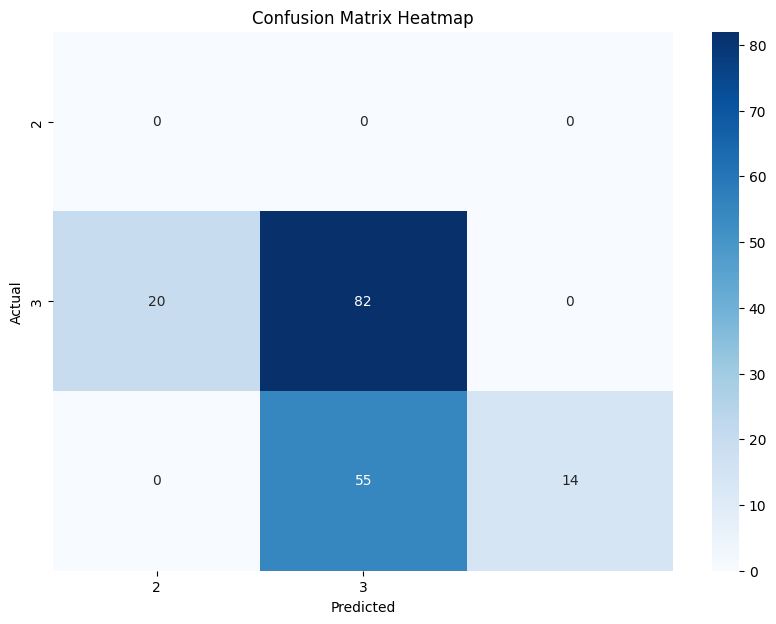

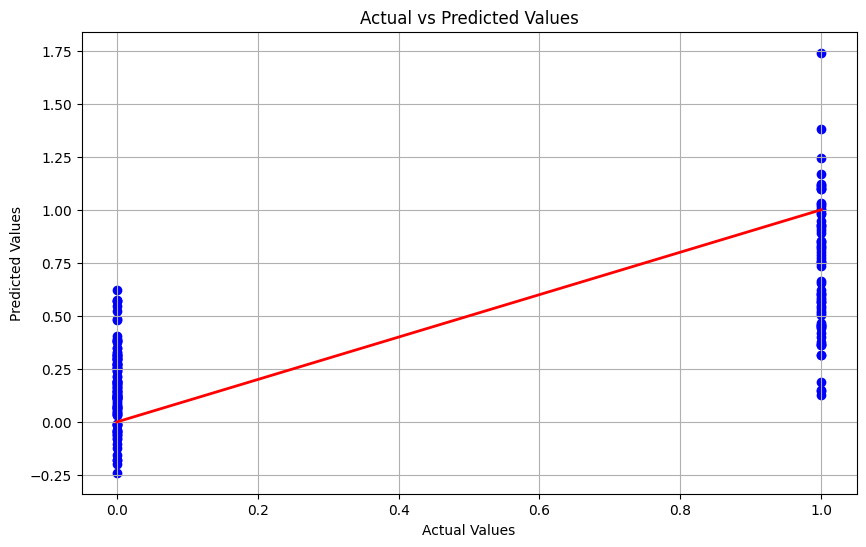

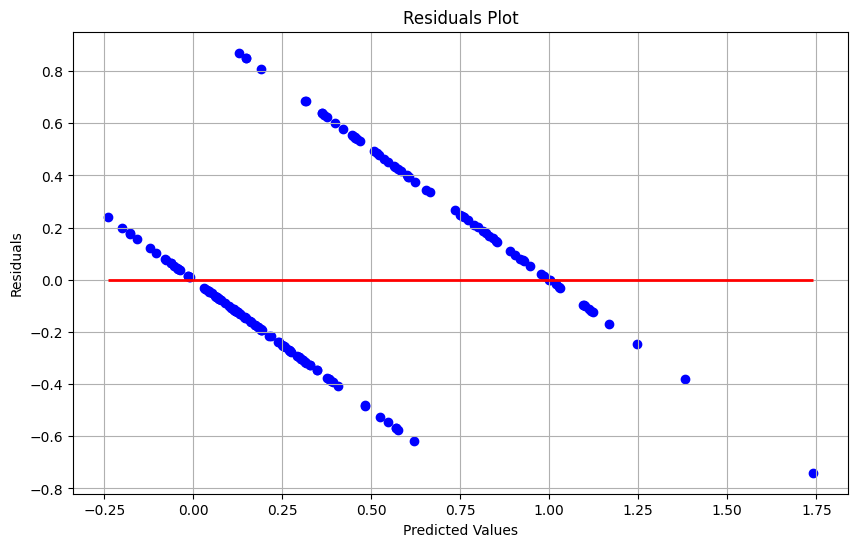

In [1]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, confusion_matrix
import pandas as pd
import numpy as np
import seaborn as sns

# Function to import data
def importdata():
    balance_data = pd.read_csv('/content/drive/MyDrive/data4.csv', sep=',', header=None)
    return balance_data

# Function to split the dataset into features and target variables
def splitdataset(balance_data):
    # Separating the target variable
    X = balance_data.values[:, 2:]
    Y = balance_data.values[:, 1]

    # Encode the target variable if it is categorical
    if Y.dtype == 'O':  # Check if the target variable is of object type (strings)
        from sklearn.preprocessing import LabelEncoder
        label_encoder = LabelEncoder()
        Y = label_encoder.fit_transform(Y)

    # Splitting the dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=100)
    return X_train, X_test, y_train, y_test

# Import the data
balance_data = importdata()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = splitdataset(balance_data)

# Select two features for plotting
X_train_2d = X_train[:, :2]
X_test_2d = X_test[:, :2]

# Build the model with only the first two features
reg = LinearRegression()

# Train the model with the selected two features
reg.fit(X_train_2d, y_train)

# Predict the model with the selected two features
y_pred = reg.predict(X_test_2d)

# Evaluate the model using various metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print('Mean Absolute Error (MAE):', mae)
print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)
print('R-squared (R²):', r2)

# Define thresholds for categorization
thresholds = np.percentile(y_test, [25, 50, 75])
y_test_cat = np.digitize(y_test, bins=thresholds)
y_pred_cat = np.digitize(y_pred, bins=thresholds)

# Compute confusion matrix
cm = confusion_matrix(y_test_cat, y_pred_cat)
print("\n Confusion Matrix:\n", cm)

# Plotting the confusion matrix heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test_cat), yticklabels=np.unique(y_test_cat))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

# Plotting the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)  # Identity line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.grid(True)
plt.show()

# Plotting the residuals
plt.figure(figsize=(10, 6))
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, color='blue')
plt.hlines(y=0, xmin=min(y_pred), xmax=max(y_pred), color='red', linewidth=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.grid(True)
plt.show()

